<a href="https://colab.research.google.com/github/AnIsAsPe/Aprendizaje-por-Refuerzo/blob/main/Notebooks/Estrategia_Exploraci%C3%B3nExplotaci%C3%B3n_Multi_Armed_Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas y Funciones


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def entorno_multi_armed_bandit(maquinas):
    '''
    Creamos el entorno para el problema "multi_armed_bandit" generando aleatoriamente
    la distribución de probabilidad de los premios que otorga cada máquina
    '''
    premio_medio = np.random.uniform(-10, 5, size=maquinas)
    desv_estandar = np.random.uniform(0, 5, size=maquinas)
    return premio_medio, desv_estandar

In [3]:
def init_Q(maquinas):
  '''Inicializa el vector Q en ceros, el vector Q representa el valor esperado
   de recompensa de cada máquina'''
  Q =np.zeros(shape =(1, maquinas))
  return Q

In [4]:
def selecciona_maquina(maquinas):
    '''selecciona una máquina aleatoriamente con distribución unifome'''
    selec = np.random.choice(range(maquinas))
    return selec

In [5]:
def selecciona_maquina_expl(maquinas):
    '''selecciona la maquina con el maximo valor de la ganancia esperada'''
    select = np.argmax(Q[0])
    return selec

In [6]:
def selecciona_maquina_egd(maquinas, ε):
    '''selecciona una con la estrategia epsilon decreasing greedy'''
    p = np.random.uniform(0,1)

    # cuándo epsilon es pequeño, se escoge la maquina con mayor ganancia
    if p < (1 - ε):
        selec = np.argmax(Q[0])
        return selec  

    # cuando epsilon es pequeño, se escoge una al azar
    else: 
        selec = np.random.choice(range(maquinas))
        return selec

In [7]:
def calcula_recompensa(selec):
  '''calcula la recompensa de jugar en una determinada máquina'''
  r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1))
  return r

In [8]:
def actualiza_Q (Q, selec, r, veces_maq):
    '''actualiza el valor esperados de recompensa de la máquina seleccionada'''
    Q[0, selec] = Q[0, selec] + 1/(veces_maq[selec])*(r - Q[0, selec])
    return Q

# Introducción

## Definimos nuestro entorno

In [9]:
### Creamos el entorno definiendo el comportamiento de cada máquina

premio_medio  = np.array([1,  2,  0, -10])
desv_estandar = np.array([1, 0.1, 5,  1])

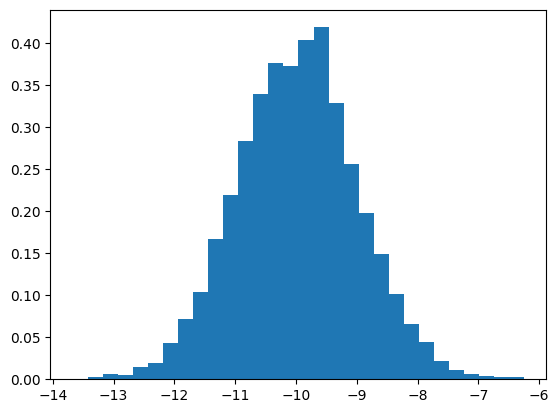


La máquina arrojo durante los primeras 10 jugadas los siguientes premios: 

[-10.46238471  -9.63114978 -11.02026087  -9.79480851  -8.41857625
  -9.77564123  -9.57083461 -10.40950587  -8.98036664  -8.71279046]


In [10]:
maquina = 3

#  r es el premio aleatorio que va a dar una máquina (dada su distribución)
r = np.random.normal(premio_medio[maquina], desv_estandar[maquina],10000)  
plt.hist( r, bins=30,  density=True)
plt.show()
print('\nLa máquina arrojo durante los primeras 10 jugadas los siguientes premios: \n')
print (r[0:10])

## ¿Que hace un jugador en el casino?

* inicializamos en cero la variable que guardará los premios o perdidas acumuladas 

In [11]:
premio_acumulado = 0

* seleccionamos una de las maquinas, 
* jugamos en ella y obtenemos la recompensa (o pérdida)
* se suma la recompensa o perdida al total acumulado

In [12]:
# 1) se selecciona una máquina
selec = 2

# 2) jugamos en la máquina seleccionada y  se obtiene una recompensa o pérdida
r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1))

# 3) se suma al premio acumulado
premio_acumulado += r
print('recompensa (r):', r)
print('Premio acumulado:', premio_acumulado)

recompensa (r): -1
Premio acumulado: -1


##  ¿Cómo guardamos la información de los premios obtenidos de cada máquina?

Promedio Incremental

$Q =  Q_{n-1}+\frac{1}{n} (r_n - Q_{n-1})$

In [13]:
# Inicializa el vector Q en ceros, donde guardaremos la información
n_maquinas = 4 
Q = np.zeros(shape =(1, n_maquinas))
Q

array([[0., 0., 0., 0.]])

In [14]:
# Vamos a jugar cierto número de veces (episodios)
episodios = 200
n_maquinas = 4
Q =np.zeros(shape =(1, n_maquinas))
premio_acumulado = 0

veces_maq = np.zeros(n_maquinas)      # guardaremos las veces que se va jugando en cada máquina


for ep in range(1, episodios+1):
      # 1) se selecciona una máquina
      selec = np.random.choice([0,1,2,3]) # selección aleatoria -> exploración
      veces_maq[selec] += 1               # actualizamos las veces que se ha jugado x máquina

      # 2) jugamos en la máquina seleccionada y  se obtiene una recompensa o pérdida
      r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1))

      # 3) se suma al premio acumulado
      premio_acumulado += r

      # 4) actualizamos la información con lo que aprendimos de la maquina en la que jugamos
      
      Q[0, selec] = Q[0, selec] + 1/(veces_maq[selec])*(r - Q[0, selec])   # Promedio incremental

      # 5) reportamos el progreso del aprendizaje
      # print('Episodio_{}, Máquina {}, Premio = {}, Premio_acum = {}, Q:{} \n'.format(ep,
      #                                                                                selec,
      #                                                                                r, 
      #                                                                                premio_acumulado,
      #                                                                                Q.round(2)))
Q, premio_acumulado

(array([[ 0.60869565,  1.49090909,  0.41666667, -9.58974359]]), -239)

¿Sería correcto si, en lugar de escojer la máquina de forma aleatoria, escojemos la que más rendimientos ha dado?

In [15]:
selec = np.argmax(Q[0])  # selección usando la estrategia de explotación
selec

1

¿Podemos pensar en una estrategia combinada?

In [16]:
p = np.random.uniform(0, 1 )  # escojemos un valor entre 0 y 1
ε = .99 # valor que disminuye desde 1 hasta 0 según avance el aprendizaje
print('p = {}, ε = {}'.format(p,ε))
print('¿p es menor que 1 - ε?', p < (1 - ε))
if p < (1 - ε):
    # Explotación
    print('explotación')
    selec = np.argmax(Q[0])
else: 
    # Exploración
    print('exploración')
    selec = np.random.choice(range(n_maquinas))
print('Máquina seleccionada: ',selec)

p = 0.1706059848432162, ε = 0.99
¿p es menor que 1 - ε? False
exploración
Máquina seleccionada:  3


In [17]:
p = np.random.uniform(0, 1 )  # escojemos un valor entre 0 y 1
ε = 0.01 # valor que disminuye desde 1 hasta 0 según avance el aprendizaje
print('p = {}, ε = {}'.format(p,ε))
print('¿p es menor que 1 - ε?', p < (1 - ε))
if p < (1 - ε):
    # Explotación
    print('explotación')
    selec = np.argmax(Q[0])
else: 
    # Exploración
    print('exploración')
    selec = np.random.choice(range(n_maquinas))
print('Máquina seleccionada: ',selec)

p = 0.10458464332814321, ε = 0.01
¿p es menor que 1 - ε? True
explotación
Máquina seleccionada:  1


Vamos a calcular  ε en función de los episodios, de manera decreciente


In [18]:
episodios = 200
epsilon_vec = np.exp(-5 * np.linspace(0, 1, episodios))
epsilon_vec

array([1.        , 0.97518739, 0.95099045, 0.9273939 , 0.90438284,
       0.88194274, 0.86005945, 0.83871913, 0.81790832, 0.79761388,
       0.777823  , 0.75852319, 0.73970225, 0.72134831, 0.70344978,
       0.68599536, 0.66897402, 0.65237503, 0.63618791, 0.62040243,
       0.60500863, 0.58999679, 0.57535743, 0.56108131, 0.54715942,
       0.53358297, 0.52034338, 0.50743231, 0.49484159, 0.48256328,
       0.47058963, 0.45891307, 0.44752624, 0.43642195, 0.42559318,
       0.41503311, 0.40473505, 0.39469252, 0.38489917, 0.37534882,
       0.36603544, 0.35695314, 0.34809621, 0.33945903, 0.33103617,
       0.3228223 , 0.31481224, 0.30700092, 0.29938343, 0.29195495,
       0.28471078, 0.27764637, 0.27075724, 0.26403904, 0.25748755,
       0.25109861, 0.2448682 , 0.23879238, 0.23286732, 0.22708927,
       0.2214546 , 0.21595973, 0.21060121, 0.20537564, 0.20027974,
       0.19531028, 0.19046412, 0.18573821, 0.18112956, 0.17663526,
       0.17225248, 0.16797845, 0.16381046, 0.1597459 , 0.15578

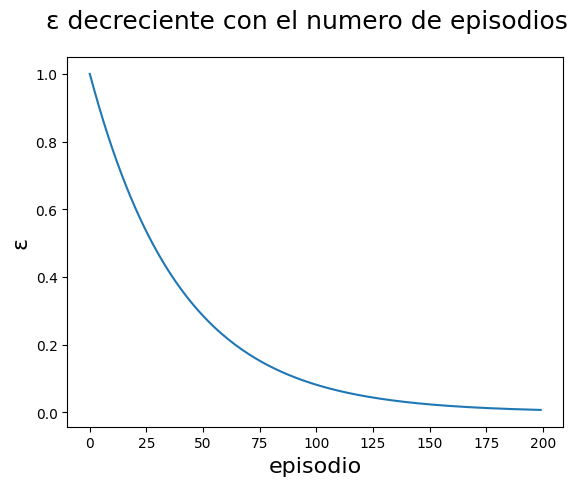

In [19]:
fig =plt.figure()
plt.plot(epsilon_vec)
plt.xlabel('episodio', fontsize=16)
plt.ylabel('ε', fontsize=16)
fig.suptitle('ε decreciente con el numero de episodios', fontsize=18)

plt.show()

# Aprendizaje con distintas estrategias

In [20]:
# ### Definimos el número de máquinas o brazos del problema
# n_maquinas = 3

# ### Creamos el entorno
# np.random.seed(28)
# premio_medio, desv_estandar = entorno_multi_armed_bandit(n_maquinas)  # inicializa la distribución de probabilidad de cada máquina
### Definimos el número de episodios (juegos)
episodios = 10000

## Exploración

In [21]:
### Inicializamos el vector Q  
Q = init_Q(n_maquinas)  
premio_acumulado = 0
veces_maq = np.zeros(n_maquinas)      # guardaremos las veces que se ha jugado por máquina
for episodio in range(1,episodios+1):
    selec = selecciona_maquina(n_maquinas)
    veces_maq[selec] += 1               # actualizamos las veces que se ha jugado x máquina
    # Calcula el premio de esa acción
    r = calcula_recompensa(selec)
    # Actualiza la información de los premios acumulados por cada máquina
    Q = actualiza_Q(Q, selec, r, veces_maq)
  
    premio_acumulado += r
  
print("La ganancia total es de: ", premio_acumulado)

La ganancia total es de:  -18402


## Explotación

In [22]:
### Inicializamos el vector Q  
Q = init_Q(n_maquinas)  
premio_acumulado = 0
veces_maq = np.zeros(n_maquinas)      # guardaremos las veces que se ha jugado por máquina
for i in range(n_maquinas):  # creamos un ciclo para jugar en cada máquina
    veces_maq[i] += 1               # actualizamos las veces que se ha jugado x máquina
    r = calcula_recompensa(i)
    Q = actualiza_Q(Q, i, r, veces_maq)
    premio_acumulado += r
for episodio in range(n_maquinas+1 ,episodios+1): # el resto de los episodios los jugamos con una estrategia codiciosa
    selec = selecciona_maquina_expl(n_maquinas)
    veces_maq[selec] += 1               # actualizamos las veces que se ha jugado x máquina
    r = calcula_recompensa(selec)
    Q = actualiza_Q(Q, selec, r, veces_maq)
    premio_acumulado += r
print("El premio acumulado es de: ", premio_acumulado)

El premio acumulado es de:  -94988


## Epsilon decreasing greedy

In [23]:
### Inicializamos el vector Q  
Q = init_Q(n_maquinas)  
epsilon_vec = np.exp(-5 * np.linspace(0, 1, episodios))  # creamos el vector con un epsilon para cada episodio
premio_acumulado = 0
veces_maq = np.zeros(n_maquinas)      # guardaremos las veces que se ha jugado por máquina
for episodio in range(1 ,episodios+1):
    ε = epsilon_vec[episodio-1]  #epsilon decreciente
    selec = selecciona_maquina_egd(n_maquinas, ε)
    veces_maq[selec] += 1               # actualizamos las veces que se ha jugado x máquina
    r = calcula_recompensa(selec)
    Q = actualiza_Q(Q, selec, r, veces_maq)
    premio_acumulado += r

print("El premio acumulado es de: ", premio_acumulado)

El premio acumulado es de:  8000


In [24]:
Q

array([[ 0.65731463,  1.50047037, -0.46804124, -9.49414063]])

# Referencias:

[1]A. Aristizabal, «Understanding Reinforcement Learning Hands-On: Multi-Armed Bandits», Medium, oct. 19, 2020. https://towardsdatascience.com/understanding-reinforcement-learning-hands-on-part-2-multi-armed-bandits-526592072bdc (accedido jul. 30, 2021).

